In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
BMI = (df['weight'] / ((df['height'] / 100 ) ** 2))

In [4]:
df['overweight'] = pd.Series([1 if i > 25 else 0 for i in BMI])

In [5]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, 
# make the value 0. If the value is more than 1, make the value 1.

df['cholesterol'] = pd.Series([1 if i > 1 else 0 for i in df['cholesterol']]) 
df['gluc'] = pd.Series([1 if i > 1 else 0 for i in df['gluc']])

In [6]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 
# 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

df_cat = pd.melt(df,id_vars=["cardio"],value_vars = ['active','alco','cholesterol','gluc','overweight','smoke'])
df_catOne = pd.melt(df,id_vars=["cardio"],value_vars = ['active','alco','cholesterol','gluc','overweight','smoke'])

In [7]:
# Group and reformat the data to split it by 'cardio'. 
# Show the counts of each feature. 
# You will have to rename one of the columns for the catplot to work correctly
df_cat0 = pd.DataFrame(df_cat.groupby('cardio').get_group(0))
df_cat1 = pd.DataFrame(df_cat.groupby('cardio').get_group(1)) 
df_cat = pd.concat([df_cat0,df_cat1])
df_cat = pd.DataFrame(df_cat.value_counts())
df_cat.reset_index(inplace=True)
df_cat.rename(columns={0: "total"},inplace=True)

In [8]:
df_cat

,cardio,variable,value,total
0,1,alco,0,33156
1,0,alco,0,33080
2,1,smoke,0,32050
3,0,smoke,0,31781
4,0,gluc,0,30894
5,0,cholesterol,0,29330
6,0,active,1,28643
7,1,gluc,0,28585
8,1,active,1,27618
9,1,overweight,1,24440


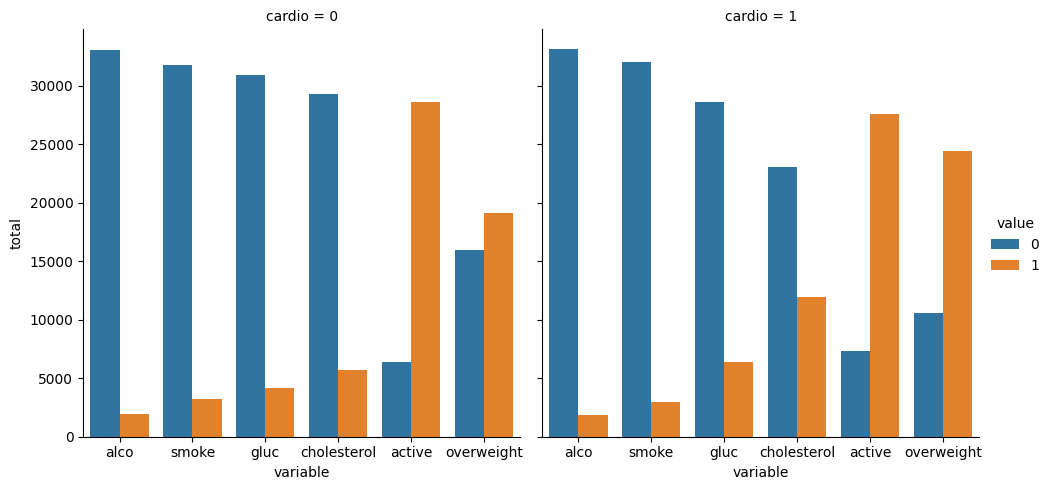

In [9]:
# Get the figure for the output
#sns.catplot(x="variable",hue="value",data=df_cat,kind="count",col="cardio")
sns_plot = sns.catplot(x="variable",y="total",hue="value",data=df_cat,kind="bar",col="cardio")

In [10]:
# Do not modify the next two lines
fig.savefig('catplot.png')

NameError: name 'fig' is not defined

In [ ]:
# Clean the data
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] >= df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] >= df['weight'].quantile(0.975))]


In [ ]:
df_heat

In [ ]:
# Calculate the correlation matrix
corr = df_heat.corr()
corr

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr))
mask.shape

In [ ]:
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=[7.6,8.4],dpi=200,facecolor="cyan",edgecolor="green",layout="constrained") 

In [ ]:
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')


In [ ]:
# Do not modify the next two lines
fig.savefig('heatmap.png')